## Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.plotting import plot_decision_regions


In [32]:
np.set_printoptions(precision=10)

## Loading the dataset

In [33]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

## Printing the correlation matrix

<Axes: >

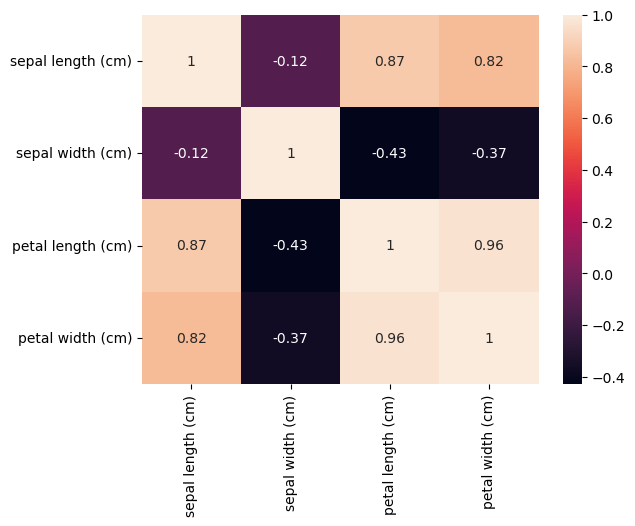

In [34]:
sns.heatmap(df.corr(), annot=True)

## Adding the target to the dataframe

In [35]:
df['target'] = data.target

### Printing the first 5 rows of the dataframe

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Printing the info and description of the dataframe

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [38]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking for null values

In [39]:
X = df.drop('target', axis=1).values
y = df['target'].values

### Splitting the data into train and test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [41]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


### Scaling the data

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Visualizing the data

C:\Users\ouhac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


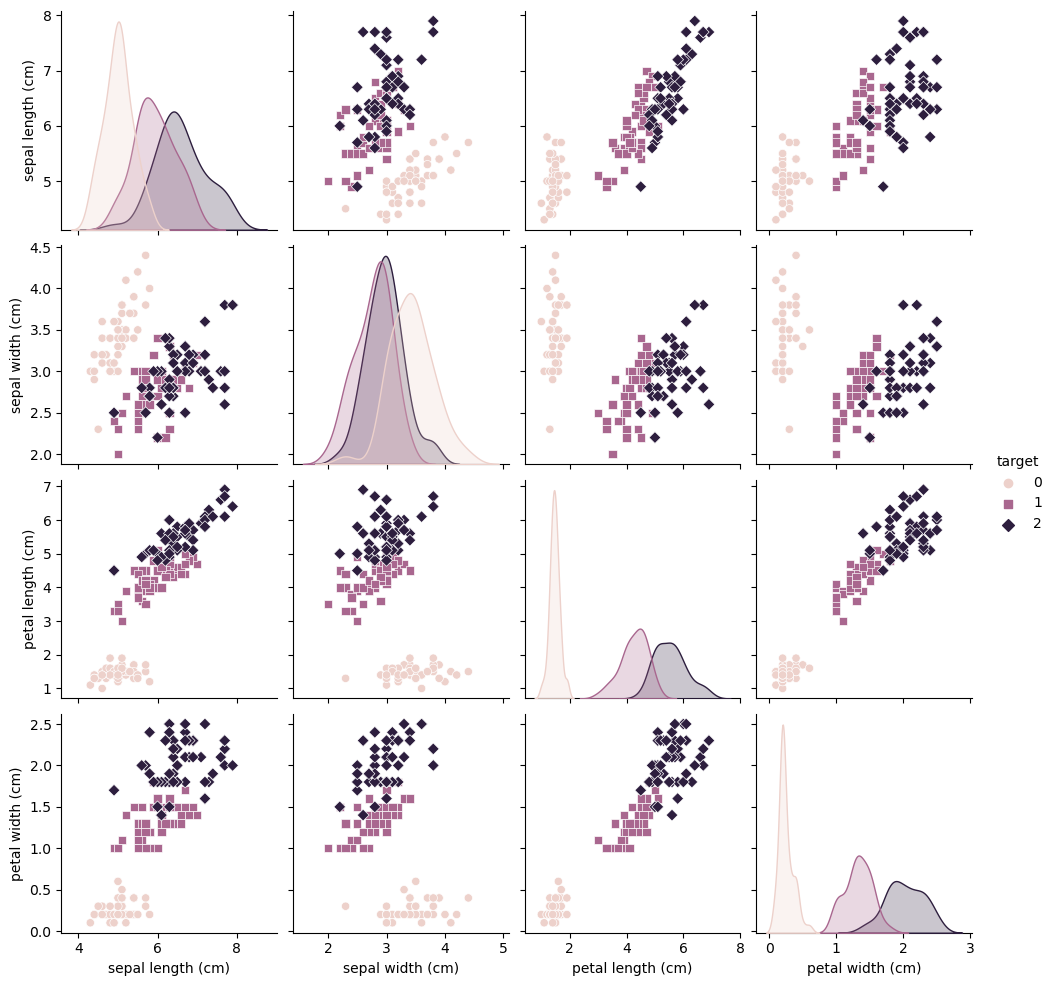

In [44]:
sns.pairplot(df, hue='target', markers=['o', 's', 'D'])

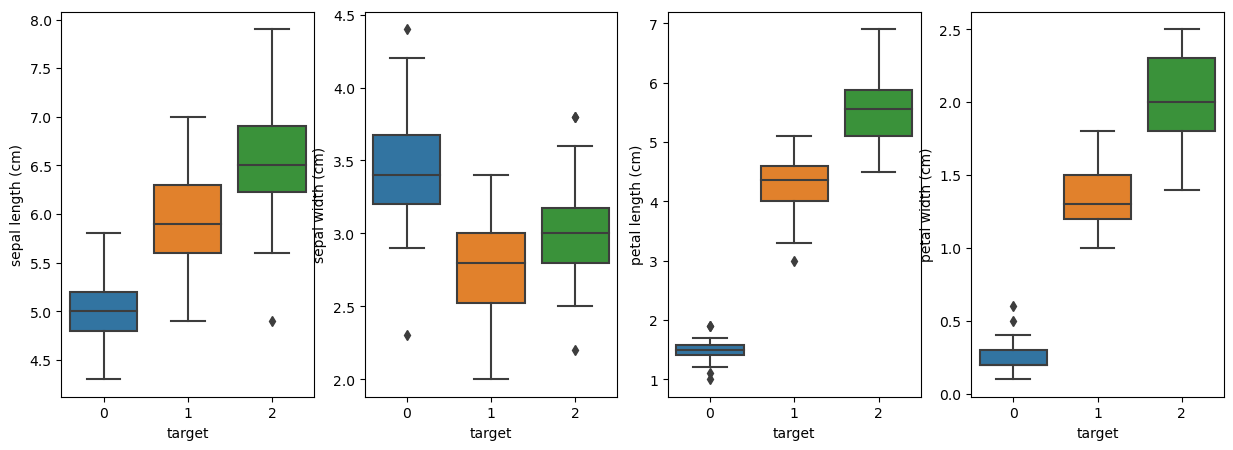

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.subplot(1, 4, 2)
sns.boxplot(x='target', y='sepal width (cm)', data=df)
plt.subplot(1, 4, 3)
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.subplot(1, 4, 4)
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.show()

# Training an rbf SVM classifier with one vs one approach

### Instantiating the model

In [46]:
svm_ovo = SVC(kernel='linear',C= 0.04, decision_function_shape='ovo')

### Fitting the model

In [47]:
svm_ovo.fit(X_train, y_train)

SVC(C=0.04, decision_function_shape='ovo', kernel='linear')

### Printing the parameters of the model:

In [48]:
print(svm_ovo.get_params())

{'C': 0.04, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Predicting the test set:

In [49]:
y_test_pred = svm_ovo.predict(X_test)

### Printing the confusion matrix and classification report of the test set:

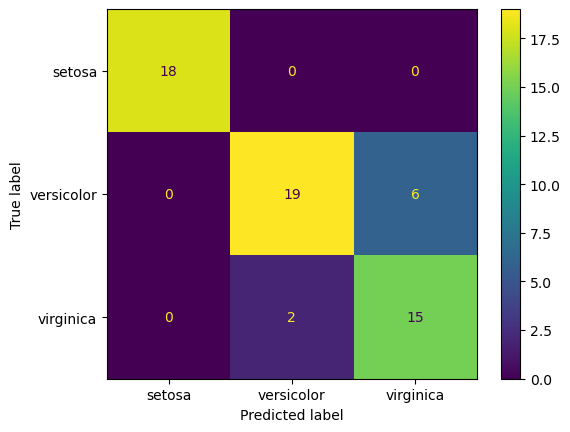

In [50]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred), display_labels=data.target_names).plot()

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.76      0.83        25
           2       0.71      0.88      0.79        17

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60


### Visualizing the decision boundary of the model (considering only the petal length and width):

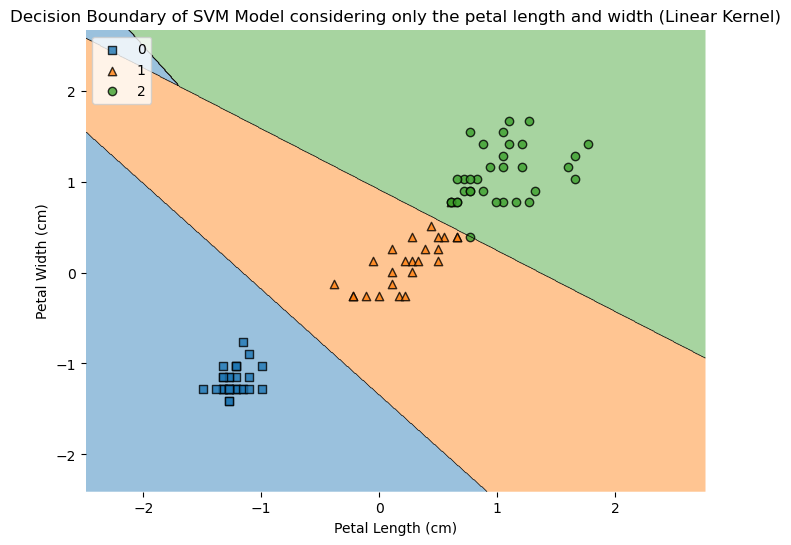

In [52]:
X_train_subset = X_train[:, [2, 3]]
X_test_subset = X_test[:, [2, 3]]

svm_best = SVC(C=0.3, kernel='linear', decision_function_shape='ovo')
svm_best.fit(X_train_subset, y_train)

plt.figure(figsize=(8, 6))

plot_decision_regions(X_train_subset, y_train, clf=svm_best, legend=2)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary of SVM Model considering only the petal length and width (Linear Kernel)')

plt.legend(loc='upper left')

plt.show()

## Hyperparameter tuning using GridSearchCV:

### Defining the parameters:

In [53]:
params = {'C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000],
              'gamma': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001],
              'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'kernel': ['linear', 'rbf', 'poly'],
              'decision_function_shape': ['ovo', 'ovr']}

### Instantiating the GridSearchCV:

In [54]:
grid = GridSearchCV(SVC(), params, refit=True, verbose=3,n_jobs=-1)

### Fitting the SVM model using GridSearchCV:

In [55]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001,
                                   0.0003, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

### Printing the best parameters:

In [56]:
grid.best_params_

{'C': 30,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 0.003,
 'kernel': 'rbf'}

### Predicting the test set on the new model:

In [57]:
y_test_pred = grid.predict(X_test)

### Printing the confusion matrix and classification report of the test set:

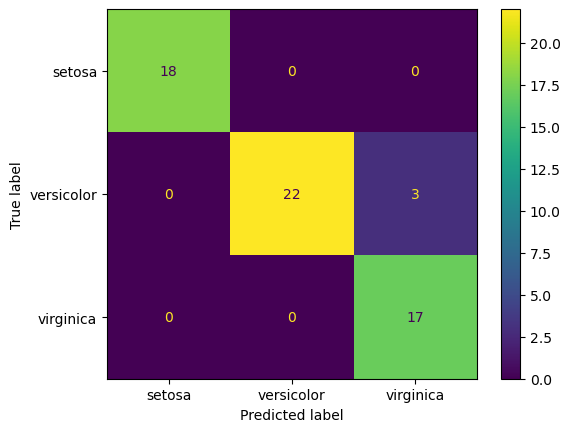

In [58]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred), display_labels=data.target_names).plot()

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.94        25
           2       0.85      1.00      0.92        17

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60


### Visualizing the decision boundary of the new model using GridSearchCV (considering only the petal length and width):

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
Best SVM's model parameters considering only the petal length and width are: {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, Accuracy: 0.95


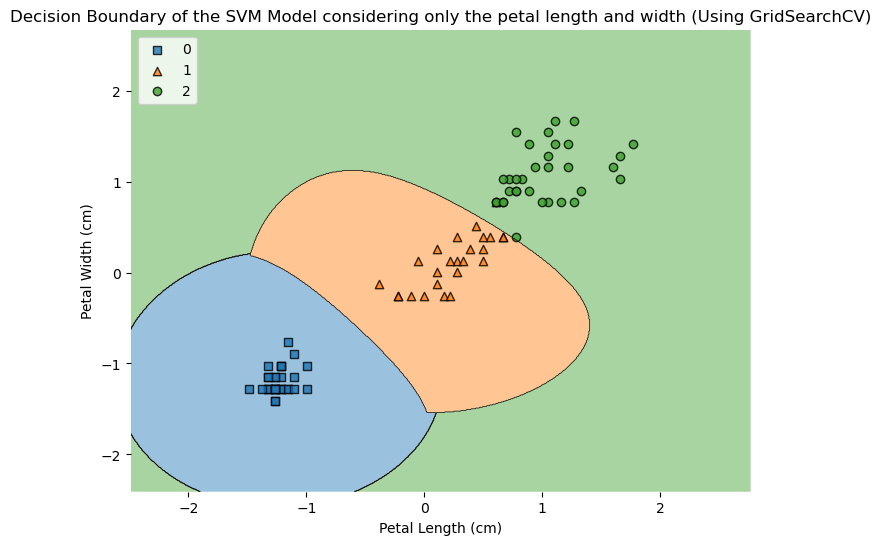

In [60]:
X_train_subset = X_train[:, [2, 3]]
X_test_subset = X_test[:, [2, 3]]

svm_best = GridSearchCV(SVC(), params, refit=True, verbose=2,n_jobs=-1)
svm_best.fit(X_train_subset, y_train)
print(f'Best SVM\'s model parameters considering only the petal length and width are: {svm_best.best_params_}, Accuracy: {accuracy_score(y_test, y_test_pred)}')

plt.figure(figsize=(8, 6))

plot_decision_regions(X_train_subset, y_train, clf=svm_best, legend=2)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary of the SVM Model considering only the petal length and width (Using GridSearchCV)')

plt.legend(loc='upper left')

plt.show()
